In [1]:
# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Ï∞®Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
df_chart.rename(columns={
    'date': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

# Ïò®Ï≤¥Ïù∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Value (USD) Ï†ÑÏ≤òÎ¶¨
df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

# Î≥ëÌï© ÌõÑ Ï†ïÎ†¨ Î∞è Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
df_merged = pd.merge(
    df_chart,
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.sort_values('Date', inplace=True)
df_merged.set_index('Date', inplace=True)


In [2]:
# 2) ÏõîÎ≥Ñ/Ï£ºÍ∞Ñ ÏßëÍ≥Ñ
# ÏõîÎ≥Ñ ÏßëÍ≥Ñ
monthly = df_merged.resample('M').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
})
monthly.reset_index(inplace=True)

# Ï£ºÍ∞Ñ ÏßëÍ≥Ñ (ÏõîÏöîÏùº Í∏∞Ï§Ä)
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
})
weekly.reset_index(inplace=True)


C:\Users\kmj\AppData\Local\Temp\ipykernel_12640\476973784.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_merged.resample('M').agg({


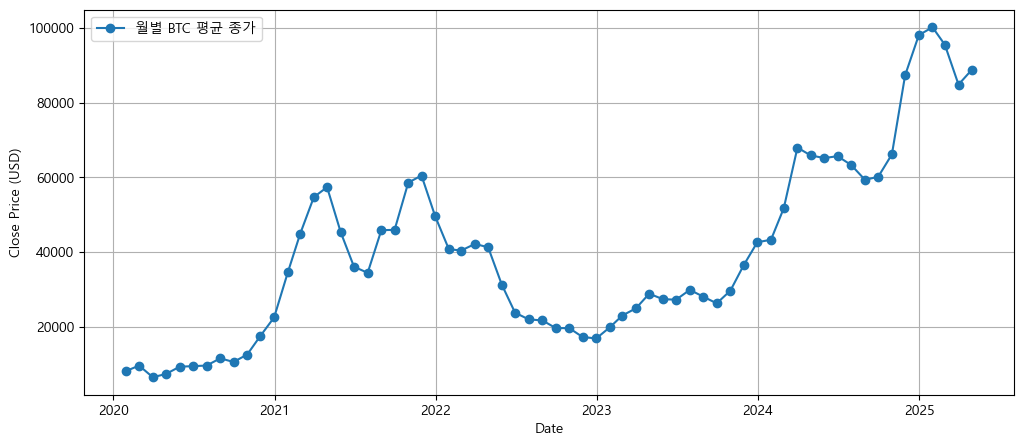

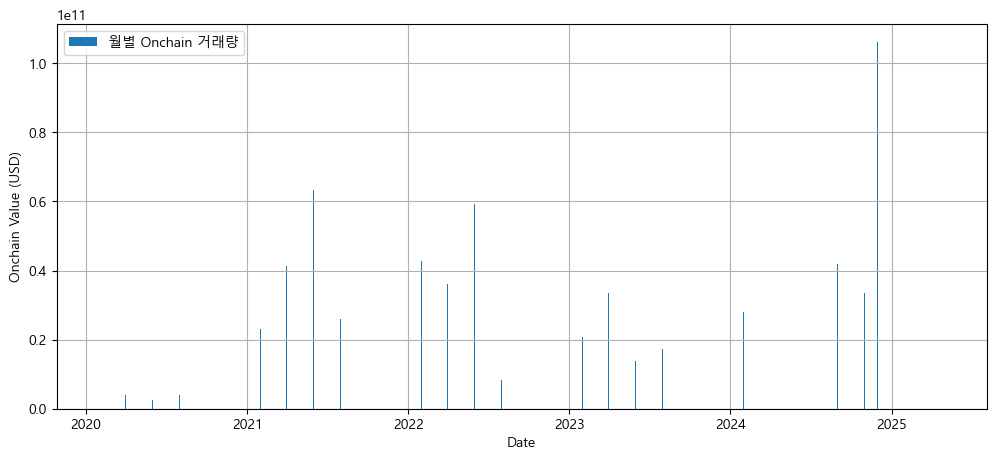

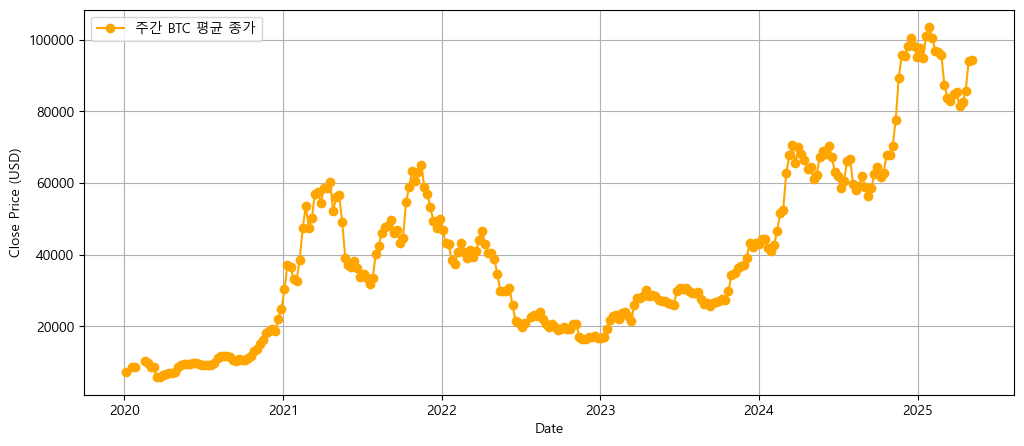

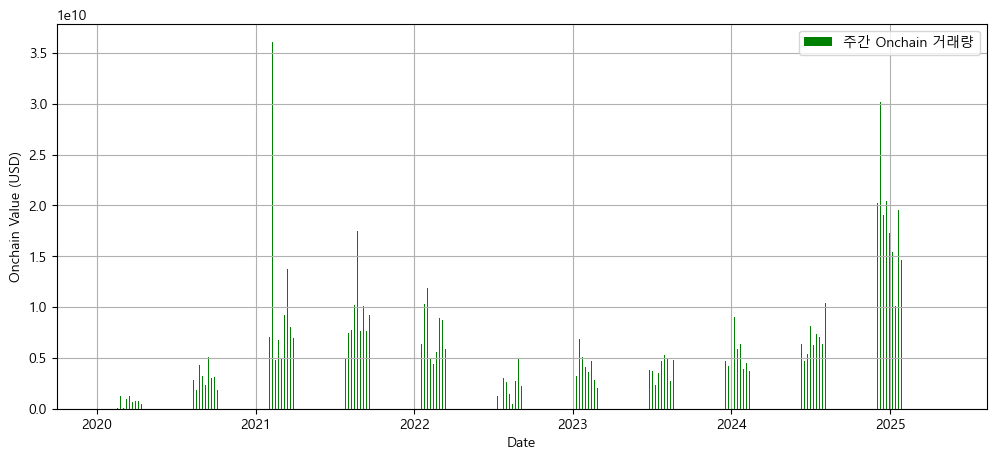

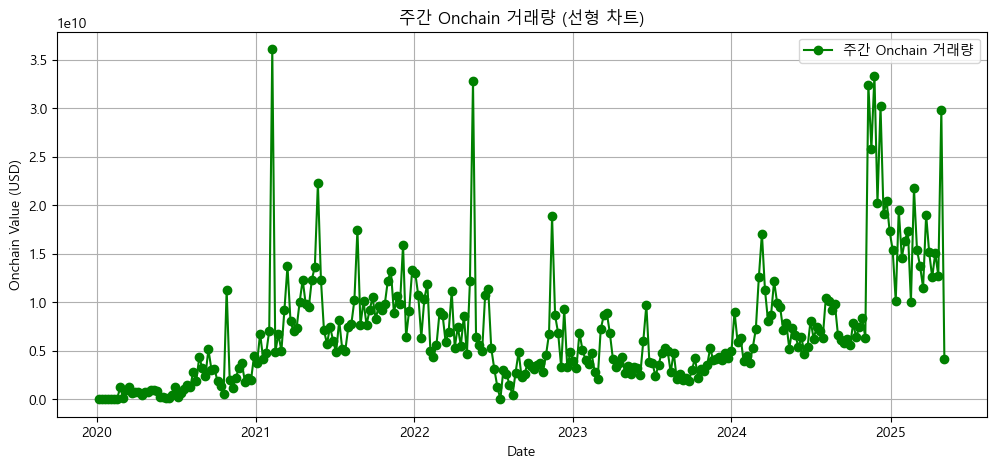

In [6]:
# 3) ÏãúÍ∞ÅÌôî (ÏõîÎ≥Ñ/Ï£ºÍ∞Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä Î∞è Onchain Í±∞ÎûòÎüâ)
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ÏõîÎ≥Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä
plt.figure(figsize=(12, 5))
plt.plot(monthly['Date'], monthly['Close'], marker='o', label='ÏõîÎ≥Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# ÏõîÎ≥Ñ Onchain Í±∞ÎûòÎüâ
plt.figure(figsize=(12, 5))
plt.bar(monthly['Date'], monthly['OnchainValue'], label='ÏõîÎ≥Ñ Onchain Í±∞ÎûòÎüâ')
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Ï£ºÍ∞Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä
plt.figure(figsize=(12, 5))
plt.plot(weekly['Date'], weekly['Close'], marker='o', color='orange', label='Ï£ºÍ∞Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ
plt.figure(figsize=(12, 5))
plt.bar(weekly['Date'], weekly['OnchainValue'], color='green', label='Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ')
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâÏùÑ ÏÑ†Ìòï(ÎùºÏù∏) Ï∞®Ìä∏Î°ú Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
plt.plot(weekly['Date'], weekly['OnchainValue'], linestyle='-', marker='o', color='green', label='Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ')
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.title('Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ (ÏÑ†Ìòï Ï∞®Ìä∏)')
plt.grid(True)
plt.legend()
plt.show()



C:\Users\kmj\AppData\Local\Temp\ipykernel_12640\3972379312.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


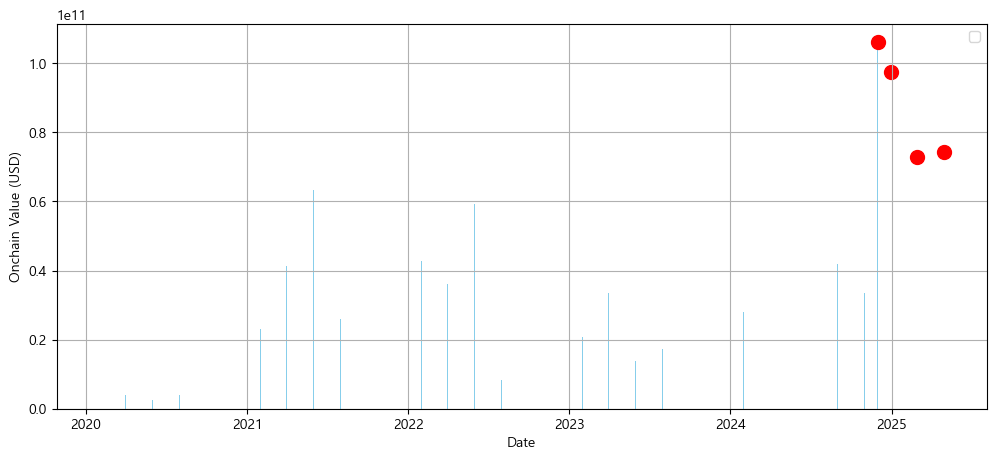

C:\Users\kmj\AppData\Local\Temp\ipykernel_12640\3972379312.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


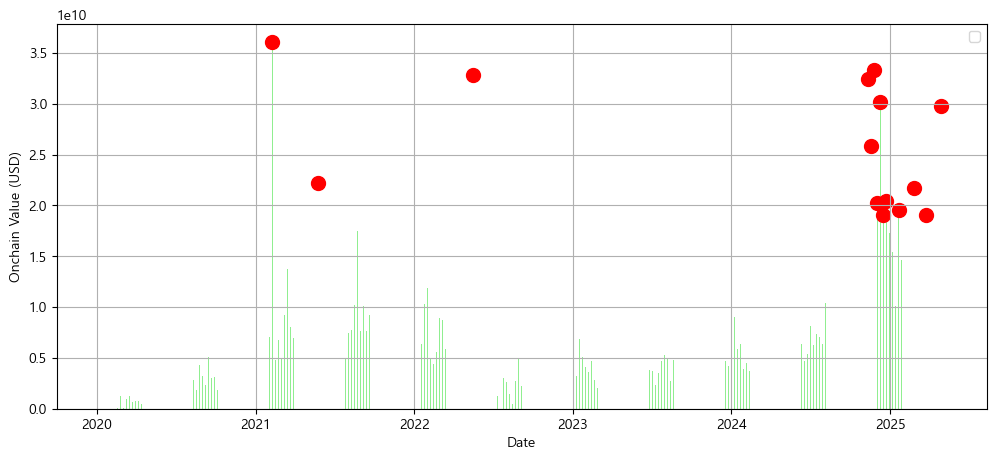

In [7]:
# 4) Ïä§ÌååÏù¥ÌÅ¨ ÌÉêÏßÄ (ÏÉÅÏúÑ 5% Í∏∞Ï§Ä)
import numpy as np

# ÏõîÎ≥Ñ Ïä§ÌååÏù¥ÌÅ¨
onchain_spike_threshold_month = np.percentile(monthly['OnchainValue'], 95)
monthly['Spike'] = monthly['OnchainValue'] > onchain_spike_threshold_month

plt.figure(figsize=(12, 5))
plt.bar(monthly['Date'], monthly['OnchainValue'], color='skyblue')
plt.scatter(
    monthly[monthly['Spike']]['Date'],
    monthly[monthly['Spike']]['OnchainValue'],
    color='red', s=100
)
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Ï£ºÍ∞Ñ Ïä§ÌååÏù¥ÌÅ¨
onchain_spike_threshold_week = np.percentile(weekly['OnchainValue'], 95)
weekly['Spike'] = weekly['OnchainValue'] > onchain_spike_threshold_week

plt.figure(figsize=(12, 5))
plt.bar(weekly['Date'], weekly['OnchainValue'], color='lightgreen')
plt.scatter(
    weekly[weekly['Spike']]['Date'],
    weekly[weekly['Spike']]['OnchainValue'],
    color='red', s=100
)
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.grid(True)
plt.legend()
plt.show()


Epoch 1/50


c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - loss: 0.0014 - val_loss: 1.4754e-04
Epoch 2/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 5.3689e-05 - val_loss: 1.1431e-04
Epoch 3/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 4.3663e-05 - val_loss: 5.2934e-05
Epoch 4/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 4.4294e-05 - val_loss: 2.9198e-05
Epoch 5/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 3.0170e-05 - val_loss: 1.8435e-05
Epoch 6/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 2.9505e-05 - val_loss: 1.5816e-05
Epoch 7/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - loss: 1.9135e-05 - val_loss: 3.5503e-05
Epoch 8/50
927/927 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

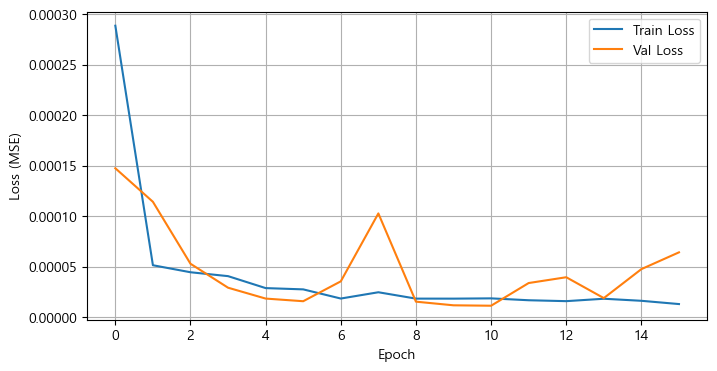

290/290 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


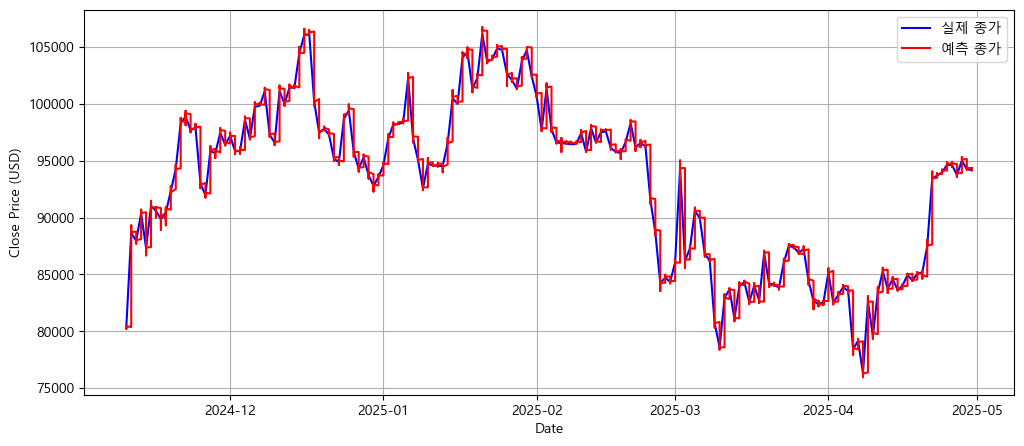

In [5]:
# 5) CNN ÏòàÏ∏° Î™®Îç∏ Ï§ÄÎπÑ Î∞è ÌïôÏäµ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# ÌäπÏÑ± Î∞è Ï†ïÍ∑úÌôî
data = df_merged[['Close', 'OnchainValue']].copy()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, 0])  # Close Í∞ÄÍ≤© ÏòàÏ∏°
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨ (80% train)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# CNN Î™®Îç∏ Ï†ïÏùò
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 2)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ÌïôÏäµ
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ÌïôÏäµ ÏÜêÏã§ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.legend()
plt.show()

# ÏòàÏ∏° Î∞è Ïó≠Î≥ÄÌôò
y_pred = model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), 1))))
)[:, 0]
y_pred_rescaled = scaler.inverse_transform(
    np.hstack((y_pred, np.zeros((len(y_pred), 1))))
)[:, 0]

# Ïã§Ï†ú vs ÏòàÏ∏° ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(df_merged.index[-len(y_test):], y_test_rescaled, label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', color='blue')
plt.plot(df_merged.index[-len(y_pred):], y_pred_rescaled, label='ÏòàÏ∏° Ï¢ÖÍ∞Ä', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


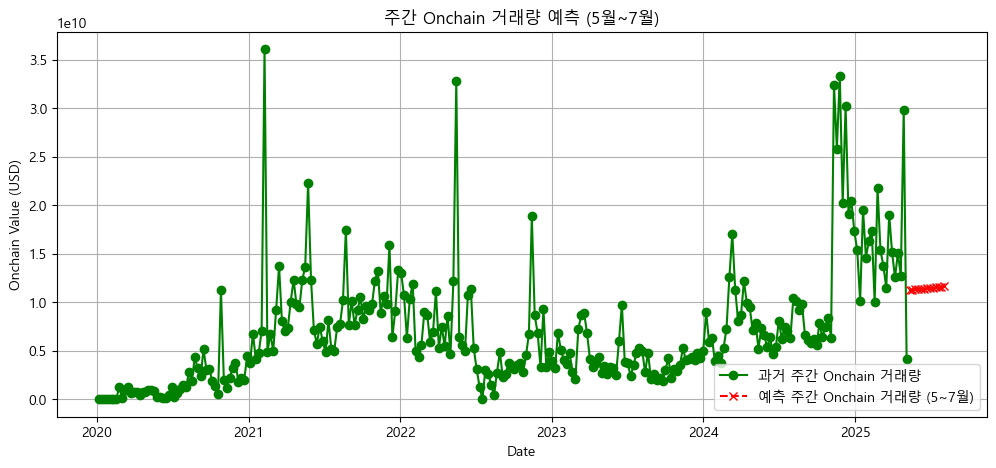

5ÏõîÎ∂ÄÌÑ∞ 7ÏõîÍπåÏßÄ Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ ÏòàÏ∏°:
      Date PredictedOnchainValue
2025-05-12        11,250,803,378
2025-05-19        11,281,328,845
2025-05-26        11,311,854,312
2025-06-02        11,342,379,780
2025-06-09        11,372,905,247
2025-06-16        11,403,430,714
2025-06-23        11,433,956,181
2025-06-30        11,464,481,649
2025-07-07        11,495,007,116
2025-07-14        11,525,532,583
2025-07-21        11,556,058,050
2025-07-28        11,586,583,518
2025-08-04        11,617,108,985


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# (1) Í∏∞Ï°¥ Ï£ºÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï§ÄÎπÑ
# Ïù¥Ï†ÑÏóê ÏÉùÏÑ±Îêú weekly DataFrameÏùÑ Ïû¨ÌòÑÌïòÍ±∞ÎÇò Ï†ÄÏû•Îêú ÏÉÅÌÉúÏóêÏÑú Î∂àÎü¨ÏôÄÏïº Ìï©ÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî ÏòàÏãúÎ°ú weekly DataFrameÏùÑ Ïû¨ÏÇ¨Ïö©ÌïúÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

# ÎßåÏïΩ Ïù¥Ï†Ñ ÏΩîÎìú ÏÑ∏ÏÖòÏóêÏÑú weekly DataFrameÏù¥ ÏóÜÎã§Î©¥, ÏïÑÎûòÏ≤òÎüº Ïû¨ÏÉùÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§:
# df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
# df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
# df_chain['ValueUSD'] = df_chain['Value (USD)'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
# df_chain['Date'] = pd.to_datetime(df_chain['Date'])
# df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)
# df_chart.rename(columns={'date': 'Date', 'open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'}, inplace=True)
# df_merged = pd.merge(df_chart, df_chain[['Date','OnchainValue']], on='Date', how='inner')
# df_merged.set_index('Date', inplace=True)
# weekly = df_merged.resample('W-MON').agg({'Close':'mean','OnchainValue':'sum'}).reset_index()

# Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú weekly DataFrameÏù¥ Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Íµ¨Ï°∞: weekly[['Date', 'OnchainValue']]

# (2) ÎÇ†ÏßúÎ•º ÏàòÏπòÌôîÌïòÏó¨ ÌöåÍ∑ÄÎ™®Îç∏ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©
weekly_model = weekly.copy()
weekly_model['Ordinal'] = weekly_model['Date'].map(lambda x: x.toordinal()).values.reshape(-1, 1)

X_train = weekly_model['Ordinal'].values.reshape(-1, 1)
y_train = weekly_model['OnchainValue'].values

# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
lr = LinearRegression()
lr.fit(X_train, y_train)

# (3) ÏòàÏ∏°Ìï† ÎØ∏Îûò Ï£ºÍ∞Ñ ÎÇ†Ïßú ÏÉùÏÑ± (5Ïõî 1Ï£ºÏ∞®Î∂ÄÌÑ∞ 7Ïõî ÎßàÏßÄÎßâ Ï£ºÍπåÏßÄ)
last_date = weekly_model['Date'].max()
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=7),
    end=last_date + pd.DateOffset(months=3),
    freq='W-MON'
)

X_future = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
y_future_pred = lr.predict(X_future)

# (4) Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Ï†ïÎ¶¨
pred_df = pd.DataFrame({
    'Date': future_dates,
    'PredictedOnchainValue': y_future_pred
})

# (5) ÏãúÍ∞ÅÌôî: Í≥ºÍ±∞ + ÏòàÏ∏°
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
plt.plot(weekly['Date'], weekly['OnchainValue'], label='Í≥ºÍ±∞ Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ', color='green', marker='o')
plt.plot(pred_df['Date'], pred_df['PredictedOnchainValue'], label='ÏòàÏ∏° Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ (5~7Ïõî)', color='red', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.title('Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ ÏòàÏ∏° (5Ïõî~7Ïõî)')
plt.grid(True)
plt.legend()
plt.show()

# (6) ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
print("5ÏõîÎ∂ÄÌÑ∞ 7ÏõîÍπåÏßÄ Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ ÏòàÏ∏°:")
print(pred_df.to_string(index=False, formatters={'PredictedOnchainValue': '{:,.0f}'.format}))


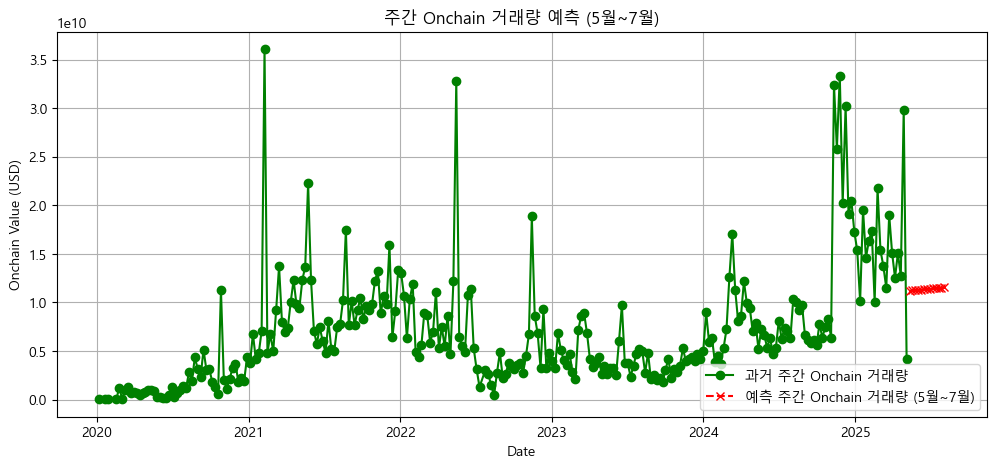

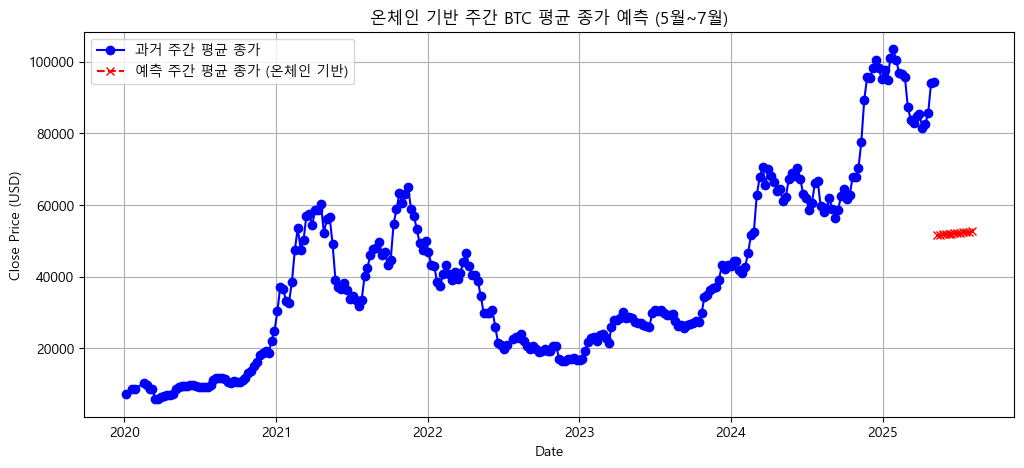

5ÏõîÎ∂ÄÌÑ∞ 7ÏõîÍπåÏßÄ Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ ÏòàÏ∏°:
      Date PredictedOnchainValue
2025-05-12        11,209,659,307
2025-05-19        11,239,486,722
2025-05-26        11,269,314,136
2025-06-02        11,299,141,551
2025-06-09        11,328,968,966
2025-06-16        11,358,796,381
2025-06-23        11,388,623,795
2025-06-30        11,418,451,210
2025-07-07        11,448,278,625
2025-07-14        11,478,106,040
2025-07-21        11,507,933,454
2025-07-28        11,537,760,869
2025-08-04        11,567,588,284

5ÏõîÎ∂ÄÌÑ∞ 7ÏõîÍπåÏßÄ Ï£ºÍ∞Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä ÏòàÏ∏° (Ïò®Ï≤¥Ïù∏ Í∏∞Î∞ò):
      Date PredictedClose
2025-05-12      51,622.03
2025-05-19      51,704.33
2025-05-26      51,786.64
2025-06-02      51,868.94
2025-06-09      51,951.24
2025-06-16      52,033.55
2025-06-23      52,115.85
2025-06-30      52,198.15
2025-07-07      52,280.46
2025-07-14      52,362.76
2025-07-21      52,445.06
2025-07-28      52,527.37
2025-08-04      52,609.67


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ‚îÄ‚îÄ‚îÄ 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥ëÌï© ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
df_chart.rename(columns={
    'date': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

df_merged = pd.merge(
    df_chart,
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.sort_values('Date', inplace=True)
df_merged.set_index('Date', inplace=True)

# ‚îÄ‚îÄ‚îÄ 2) Ï£ºÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ (ÏõîÏöîÏùº Í∏∞Ï§Ä) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).reset_index()

# NaNÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ Ï†úÍ±∞
weekly = weekly.dropna(subset=['Close', 'OnchainValue']).copy()

# ‚îÄ‚îÄ‚îÄ 3) Í≥ºÍ±∞ Ï£ºÍ∞Ñ Onchain ‚Üí ÎØ∏Îûò Ï£ºÍ∞Ñ Onchain ÏòàÏ∏° ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weekly_model = weekly.copy()
weekly_model['Ordinal'] = weekly_model['Date'].map(lambda x: x.toordinal()).values.reshape(-1, 1)

X_onchain_train = weekly_model['Ordinal'].values.reshape(-1, 1)
y_onchain_train = weekly_model['OnchainValue'].values

lr_onchain = LinearRegression()
lr_onchain.fit(X_onchain_train, y_onchain_train)

last_date = weekly_model['Date'].max()
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=7),
    end=last_date + pd.DateOffset(months=3),
    freq='W-MON'
)
X_onchain_future = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
y_onchain_future = lr_onchain.predict(X_onchain_future)

pred_df = pd.DataFrame({
    'Date': future_dates,
    'PredictedOnchainValue': y_onchain_future
})

# ‚îÄ‚îÄ‚îÄ 4) Ïò®Ï≤¥Ïù∏ ‚Üí Í∞ÄÍ≤© ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ Î∞è Í∞ÄÍ≤© ÏòàÏ∏° ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# (Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâÍ≥º Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§ Í∞ÄÏ†ï)
price_model = LinearRegression()

X_price_train = weekly[['OnchainValue']].values
y_price_train = weekly['Close'].values
price_model.fit(X_price_train, y_price_train)

X_price_future = pred_df['PredictedOnchainValue'].values.reshape(-1, 1)
y_price_future = price_model.predict(X_price_future)

pred_price_df = pd.DataFrame({
    'Date': pred_df['Date'],
    'PredictedClose': y_price_future
})

# ‚îÄ‚îÄ‚îÄ 5) ÏãúÍ∞ÅÌôî: Í≥ºÍ±∞ vs ÏòàÏ∏° ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# (A) Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ: Í≥ºÍ±∞ + ÏòàÏ∏°
plt.figure(figsize=(12, 5))
plt.plot(
    weekly['Date'], weekly['OnchainValue'],
    label='Í≥ºÍ±∞ Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ', color='green', marker='o'
)
plt.plot(
    pred_df['Date'], pred_df['PredictedOnchainValue'],
    label='ÏòàÏ∏° Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ (5Ïõî~7Ïõî)',
    color='red', linestyle='--', marker='x'
)
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.title('Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ ÏòàÏ∏° (5Ïõî~7Ïõî)')
plt.grid(True)
plt.legend()
plt.show()

# (B) Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä: Í≥ºÍ±∞ + Ïò®Ï≤¥Ïù∏ Í∏∞Î∞ò ÏòàÏ∏°
plt.figure(figsize=(12, 5))
plt.plot(
    weekly['Date'], weekly['Close'],
    label='Í≥ºÍ±∞ Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä', color='blue', marker='o'
)
plt.plot(
    pred_price_df['Date'], pred_price_df['PredictedClose'],
    label='ÏòàÏ∏° Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä (Ïò®Ï≤¥Ïù∏ Í∏∞Î∞ò)',
    color='red', linestyle='--', marker='x'
)
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Ïò®Ï≤¥Ïù∏ Í∏∞Î∞ò Ï£ºÍ∞Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä ÏòàÏ∏° (5Ïõî~7Ïõî)')
plt.grid(True)
plt.legend()
plt.show()

# ‚îÄ‚îÄ‚îÄ 6) ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("5ÏõîÎ∂ÄÌÑ∞ 7ÏõîÍπåÏßÄ Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ ÏòàÏ∏°:")
print(pred_df.to_string(index=False, formatters={'PredictedOnchainValue': '{:,.0f}'.format}))

print("\n5ÏõîÎ∂ÄÌÑ∞ 7ÏõîÍπåÏßÄ Ï£ºÍ∞Ñ BTC ÌèâÍ∑† Ï¢ÖÍ∞Ä ÏòàÏ∏° (Ïò®Ï≤¥Ïù∏ Í∏∞Î∞ò):")
print(pred_price_df.to_string(index=False, formatters={'PredictedClose': '{:,.2f}'.format}))


c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.8503649635036497
              precision    recall  f1-score   support

        Down      0.000     0.000     0.000        13
        Flat      0.850     1.000     0.919       233
          Up      0.000     0.000     0.000        28

    accuracy                          0.850       274
   macro avg      0.283     0.333     0.306       274
weighted avg      0.723     0.850     0.782       274



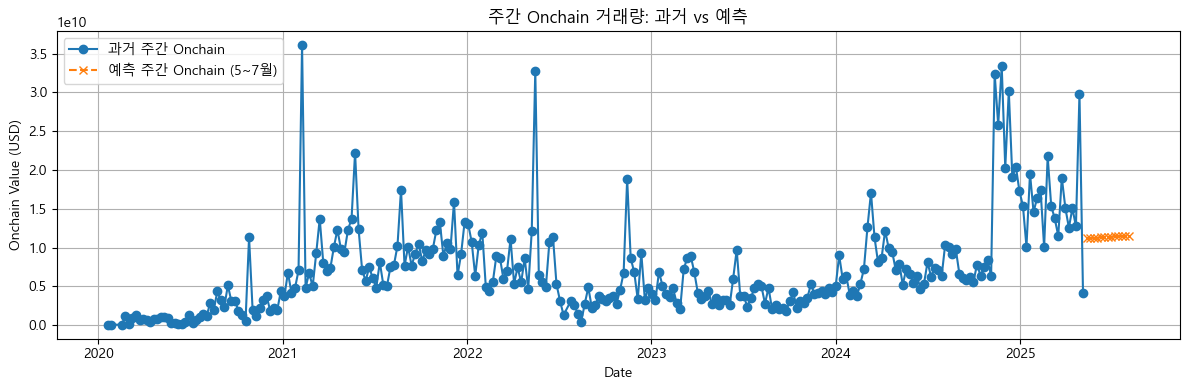

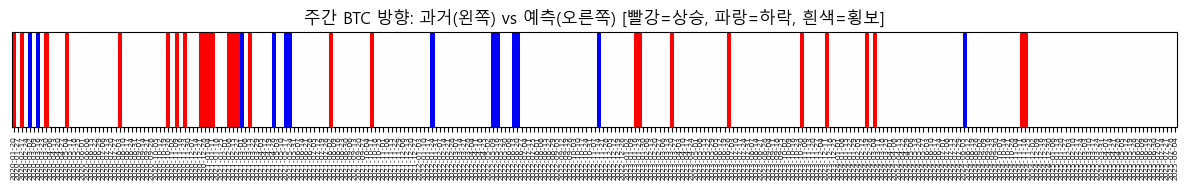

ÏòàÏ∏° Í∏∞Í∞Ñ(5Ïõî~7Ïõî) Ï£ºÍ∞Ñ BTC Î∞©Ìñ• ÏòàÏ∏°:
      Date PredictedDirection
2025-05-12               Flat
2025-05-19               Flat
2025-05-26               Flat
2025-06-02               Flat
2025-06-09               Flat
2025-06-16               Flat
2025-06-23               Flat
2025-06-30               Flat
2025-07-07               Flat
2025-07-14               Flat
2025-07-21               Flat
2025-07-28               Flat
2025-08-04               Flat


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# ‚îÄ‚îÄ‚îÄ 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï£ºÍ∞Ñ ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
df_chart.rename(columns={
    'date': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

df_merged = pd.merge(
    df_chart,
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.sort_values('Date', inplace=True)
df_merged.set_index('Date', inplace=True)

weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ‚îÄ‚îÄ‚îÄ 2) Ï£ºÍ∞Ñ Í∞ÄÍ≤© Î≥ÄÎèô Î†àÏù¥Î∏î ÏÉùÏÑ± ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Ïù¥Ï†Ñ Ï£º ÎåÄÎπÑ Ï¢ÖÍ∞Ä Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
weekly['PrevClose'] = weekly['Close'].shift(1)
weekly = weekly.dropna(subset=['PrevClose']).copy()
weekly['Return'] = (weekly['Close'] - weekly['PrevClose']) / weekly['PrevClose']

# ÏûÑÍ≥ÑÏπò ÏÑ§Ï†ï (¬±10% Ïù¥ÎÇ¥Îäî Ìö°Î≥¥Î°ú ÌåêÎã®)
threshold = 0.1
conditions = [
    (weekly['Return'] > threshold),
    (weekly['Return'] < -threshold)
]
choices = ['Up', 'Down']
weekly['Direction'] = np.select(conditions, choices, default='Flat')

# ‚îÄ‚îÄ‚îÄ 3) Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞Î°ú Ïò®Ï≤¥Ïù∏‚ÜíÎ∞©Ìñ• Î∂ÑÎ•ò Î™®Îç∏ ÌõàÎ†® ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ÌîºÏ≤ò: Í∏àÏ£º OnchainValue, Î†àÏù¥Î∏î: Direction
X_cls = weekly[['OnchainValue']].values
y_cls = weekly['Direction'].values

# ÌëúÏ§ÄÌôî
scaler_cls = StandardScaler()
X_cls_scaled = scaler_cls.fit_transform(X_cls)

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
clf.fit(X_cls_scaled, y_cls)

# Ï†ÅÌï©ÏÑ± ÌôïÏù∏ (ÌõàÎ†® Ï†ïÌôïÎèÑ)
y_pred_train = clf.predict(X_cls_scaled)
print("ÌõàÎ†® Ï†ïÌôïÎèÑ:", accuracy_score(y_cls, y_pred_train))
print(classification_report(y_cls, y_pred_train, digits=3))

# ‚îÄ‚îÄ‚îÄ 4) Í≥ºÍ±∞ Ïò®Ï≤¥Ïù∏ ÏãúÍ≥ÑÏó¥Î°ú ÎØ∏Îûò Ïò®Ï≤¥Ïù∏ ÏòàÏ∏° ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weekly_model = weekly[['Date', 'OnchainValue']].copy()
weekly_model['Ordinal'] = weekly_model['Date'].map(lambda x: x.toordinal())

X_onchain = weekly_model['Ordinal'].values.reshape(-1, 1)
y_onchain = weekly_model['OnchainValue'].values

lr_onchain = LinearRegression()
lr_onchain.fit(X_onchain, y_onchain)

last_date = weekly_model['Date'].max()
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=7),
    end=last_date + pd.DateOffset(months=3),
    freq='W-MON'
)
X_onchain_future = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
y_onchain_future = lr_onchain.predict(X_onchain_future)

pred_onchain_df = pd.DataFrame({
    'Date': future_dates,
    'PredOnchainValue': y_onchain_future
})

# ‚îÄ‚îÄ‚îÄ 5) ÎØ∏Îûò Ïò®Ï≤¥Ïù∏‚ÜíÏòàÏ∏° Î∞©Ìñ• ÏÉùÏÑ± ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
X_future_cls = scaler_cls.transform(pred_onchain_df[['PredOnchainValue']])
y_future_dir = clf.predict(X_future_cls)

pred_dir_df = pd.DataFrame({
    'Date': future_dates,
    'PredictedDirection': y_future_dir
})

# ‚îÄ‚îÄ‚îÄ 6) Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# (A) Í≥ºÍ±∞ Ï£ºÍ∞Ñ Ïò®Ï≤¥Ïù∏ vs ÏòàÏ∏° Ï£ºÍ∞Ñ Ïò®Ï≤¥Ïù∏
plt.figure(figsize=(12, 4))
plt.plot(weekly['Date'], weekly['OnchainValue'], label='Í≥ºÍ±∞ Ï£ºÍ∞Ñ Onchain', marker='o')
plt.plot(pred_onchain_df['Date'], pred_onchain_df['PredOnchainValue'],
         label='ÏòàÏ∏° Ï£ºÍ∞Ñ Onchain (5~7Ïõî)', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Onchain Value (USD)')
plt.title('Ï£ºÍ∞Ñ Onchain Í±∞ÎûòÎüâ: Í≥ºÍ±∞ vs ÏòàÏ∏°')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# (B) Í≥ºÍ±∞ vs ÏòàÏ∏° Ï£ºÍ∞Ñ Î∞©Ìñ• ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 2))
# Ïà´Ïûê Îß§Ìïë: Up=1, Flat=0, Down=-1
mapping = {'Up': 1, 'Flat': 0, 'Down': -1}
hist_dir_numeric = weekly['Direction'].map(mapping).values.reshape(1, -1)
fut_dir_numeric = pred_dir_df['PredictedDirection'].map(mapping).values.reshape(1, -1)
combined = np.concatenate([hist_dir_numeric, fut_dir_numeric], axis=1)

dates_combined = pd.concat([weekly['Date'], pred_dir_df['Date']])
plt.imshow(combined, aspect='auto', cmap='bwr', vmin=-1, vmax=1)
plt.yticks([])
plt.xticks(
    ticks=np.arange(len(dates_combined)),
    labels=[d.strftime('%Y-%m-%d') for d in dates_combined],
    rotation=90, fontsize=6
)
plt.title('Ï£ºÍ∞Ñ BTC Î∞©Ìñ•: Í≥ºÍ±∞(ÏôºÏ™Ω) vs ÏòàÏ∏°(Ïò§Î•∏Ï™Ω) [Îπ®Í∞ï=ÏÉÅÏäπ, ÌååÎûë=ÌïòÎùΩ, Ìù∞ÏÉâ=Ìö°Î≥¥]')
plt.tight_layout()
plt.show()

# (C) ÏòàÏ∏° Í≤∞Í≥º ÌÖåÏù¥Î∏î
print("ÏòàÏ∏° Í∏∞Í∞Ñ(5Ïõî~7Ïõî) Ï£ºÍ∞Ñ BTC Î∞©Ìñ• ÏòàÏ∏°:")
print(pred_dir_df.to_string(index=False))


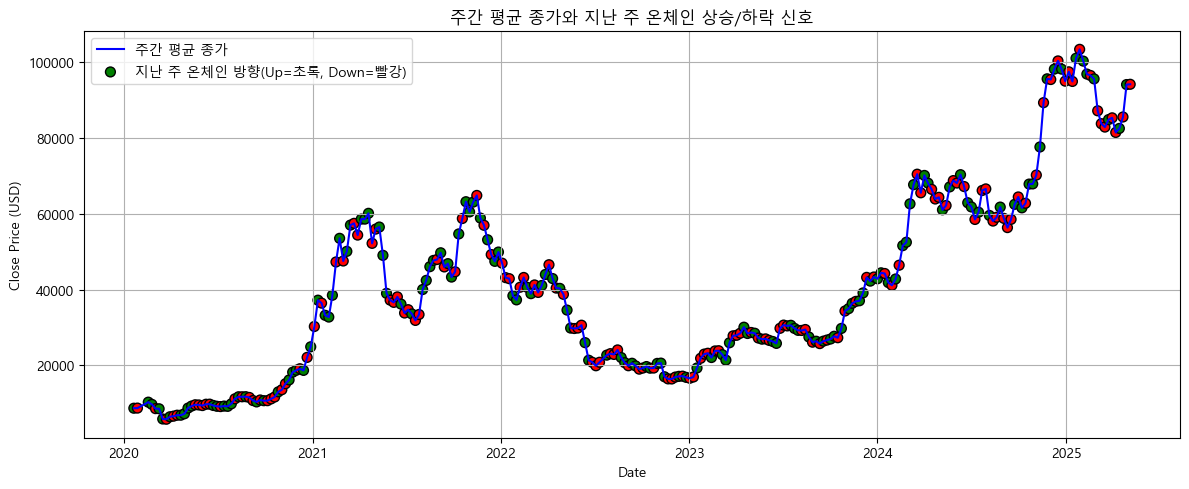

Ï£ºÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ (OnchainPrev ‚Üí OnchainValue, Î∞©Ìñ•, ÌèâÍ∑† Ï¢ÖÍ∞Ä):
      Date    OnchainPrev   OnchainValue OnchainDir      Close
2020-01-20     61,262,214     64,600,000         Up   8,701.70
2020-01-27     64,600,000     43,004,739       Down   8,736.03
2020-02-17     43,004,739     60,000,000         Up  10,300.15
2020-02-24     60,000,000  1,225,710,088         Up   9,718.39
2020-03-02  1,225,710,088    106,581,274       Down   8,596.29
2020-03-09    106,581,274    971,860,508         Up   8,553.46
2020-03-16    971,860,508  1,259,452,105         Up   5,857.34
2020-03-23  1,259,452,105    690,304,039       Down   5,795.05
2020-03-30    690,304,039    756,736,278         Up   6,444.23
2020-04-06    756,736,278    716,913,857       Down   6,605.74
2020-04-13    716,913,857    435,413,914       Down   6,861.20
2020-04-20    435,413,914    730,396,718         Up   6,858.80
2020-04-27    730,396,718    784,254,115         Up   7,230.06
2020-05-04    784,254,115    978,423,819   

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥ëÌï©
df_chart = pd.read_csv(
    './chart/BINANCE_BTCUSDT_daily_UTC.csv',
    parse_dates=['date']
)
df_chart.rename(columns={
    'date': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

df_chain = pd.read_csv(
    './onchain/usdt_onchain.csv',
    encoding='utf-8-sig'
)
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

df_merged = pd.merge(
    df_chart,
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.sort_values('Date', inplace=True)
df_merged.set_index('Date', inplace=True)

# 2) Ï£ºÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ (ÏõîÏöîÏùº Í∏∞Ï§Ä)
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# 3) Ïò®Ï≤¥Ïù∏ Ï£ºÍ∞Ñ Î≥ÄÎèô Î∞©Ìñ• Í≥ÑÏÇ∞
weekly['OnchainPrev'] = weekly['OnchainValue'].shift(1)
weekly = weekly.dropna(subset=['OnchainPrev']).copy()
weekly['OnchainDir'] = np.where(
    weekly['OnchainValue'] > weekly['OnchainPrev'],
    'Up', 'Down'
)

# 4) Í∞ÄÍ≤© Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞ÄÏôÄ Ïò®Ï≤¥Ïù∏ ÏßÄÌëúÎ•º ÎèôÏùºÌïú DataFrameÏóê Ïú†ÏßÄ
#    Í∞ÄÍ≤©ÏóêÎßå NaNÏù¥ ÏóÜÏúºÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

# 5) ÏãúÍ∞ÅÌôî: Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä ÏúÑÏóê 'ÏßÄÎÇú Ï£º Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ/ÌïòÎùΩ' ÎßàÏª§ ÌëúÏãú
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
plt.plot(
    weekly['Date'], weekly['Close'],
    label='Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä', color='blue', linewidth=1.5
)

# 'ÏßÄÎÇú Ï£º Ïò®Ï≤¥Ïù∏ Î∞©Ìñ•'ÏùÑ Ïù¥Î≤à Ï£º Í∞ÄÍ≤©Ïóê ÎßàÌÇπ
# (Ïù¥Î≤à Ï£º Ïù∏Îç±Ïä§ Í∏∞Ï§ÄÏúºÎ°ú, Ïò®Ï≤¥Ïù∏Dir Ïª¨ÎüºÏù¥ ÏßÄÎÇú Ï£º Î≥ÄÎèô Ïã†Ìò∏)
colors = weekly['OnchainDir'].map({'Up': 'green', 'Down': 'red'})
plt.scatter(
    weekly['Date'], weekly['Close'],
    c=colors, s=50, edgecolor='k', label='ÏßÄÎÇú Ï£º Ïò®Ï≤¥Ïù∏ Î∞©Ìñ•(Up=Ï¥àÎ°ù, Down=Îπ®Í∞ï)'
)

plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Ï£ºÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞ÄÏôÄ ÏßÄÎÇú Ï£º Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ/ÌïòÎùΩ Ïã†Ìò∏')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6) Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†• (Ïò®Ï≤¥Ïù∏ Î≥ÄÌôîÏôÄ Í∞ÄÍ≤©)
print("Ï£ºÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ (OnchainPrev ‚Üí OnchainValue, Î∞©Ìñ•, ÌèâÍ∑† Ï¢ÖÍ∞Ä):")
print(
    weekly[['Date', 'OnchainPrev', 'OnchainValue', 'OnchainDir', 'Close']]
    .to_string(index=False, formatters={
        'OnchainPrev': '{:,.0f}'.format,
        'OnchainValue': '{:,.0f}'.format,
        'Close': '{:,.2f}'.format
    })
)


C:\Users\kmj\AppData\Local\Temp\ipykernel_12640\1648728950.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_merged.resample('M').agg({


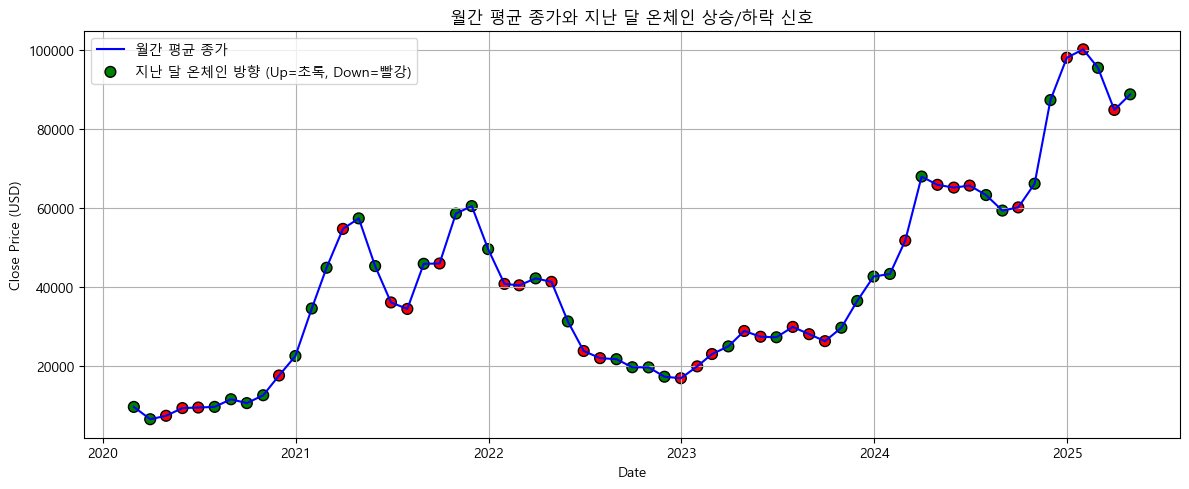

ÏõîÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ (OnchainPrev ‚Üí OnchainValue, Î∞©Ìñ•, ÌèâÍ∑† Ï¢ÖÍ∞Ä):
      Date     OnchainPrev    OnchainValue OnchainDir      Close
2020-02-29     168,866,953   1,328,210,086         Up   9,694.88
2020-03-31   1,328,210,086   3,881,884,755         Up   6,580.86
2020-04-30   3,881,884,755   3,308,851,830       Down   7,452.02
2020-05-31   3,308,851,830   2,538,852,187       Down   9,399.30
2020-06-30   2,538,852,187   2,056,824,935       Down   9,537.55
2020-07-31   2,056,824,935   4,003,903,101         Up   9,703.97
2020-08-31   4,003,903,101  12,783,357,966         Up  11,632.99
2020-09-30  12,783,357,966  14,177,781,122         Up  10,653.00
2020-10-31  14,177,781,122  15,703,258,764         Up  12,648.00
2020-11-30  15,703,258,764  11,046,404,681       Down  17,639.38
2020-12-31  11,046,404,681  12,237,964,202         Up  22,567.74
2021-01-31  12,237,964,202  23,206,452,252         Up  34,590.59
2021-02-28  23,206,452,252  52,683,289,067         Up  44,892.90
2021-03-31  52,

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥ëÌï© (weekly ÏΩîÎìúÏôÄ ÎèôÏùºÌïòÍ≤å Ïã§ÌñâÎêú ÌõÑ, df_mergedÍ∞Ä Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï)
# ÎßåÏïΩ df_mergedÍ∞Ä ÏóÜÎã§Î©¥, Ïù¥ Î∂ÄÎ∂ÑÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌïòÏÑ∏Ïöî:
#
# df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
# df_chart.rename(columns={
#     'date': 'Date','open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'
# }, inplace=True)
#
# df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
# df_chain['ValueUSD'] = (
#     df_chain['Value (USD)']
#     .astype(str)
#     .str.replace(r'[\$,]', '', regex=True)
#     .astype(float)
# )
# df_chain['Date'] = pd.to_datetime(df_chain['Date'])
# df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)
#
# df_merged = pd.merge(
#     df_chart,
#     df_chain[['Date', 'OnchainValue']],
#     on='Date',
#     how='inner'
# )
# df_merged.sort_values('Date', inplace=True)
# df_merged.set_index('Date', inplace=True)

# ‚îÄ‚îÄ‚îÄ 2) ÏõîÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
monthly = df_merged.resample('M').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ‚îÄ‚îÄ‚îÄ 3) Ïò®Ï≤¥Ïù∏ ÏõîÍ∞Ñ Î≥ÄÎèô Î∞©Ìñ• Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
monthly['OnchainPrev'] = monthly['OnchainValue'].shift(1)
monthly = monthly.dropna(subset=['OnchainPrev']).copy()
monthly['OnchainDir'] = np.where(
    monthly['OnchainValue'] > monthly['OnchainPrev'],
    'Up', 'Down'
)

# ‚îÄ‚îÄ‚îÄ 4) ÏãúÍ∞ÅÌôî: ÏõîÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä ÏúÑÏóê 'ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ/ÌïòÎùΩ' ÎßàÏª§ ÌëúÏãú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
plt.plot(
    monthly['Date'], monthly['Close'],
    label='ÏõîÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä', color='blue', linewidth=1.5
)

# 'ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ Î∞©Ìñ•'ÏùÑ Ïù¥Î≤à Îã¨ Í∞ÄÍ≤©Ïóê ÎßàÌÇπ
colors = monthly['OnchainDir'].map({'Up': 'green', 'Down': 'red'})
plt.scatter(
    monthly['Date'], monthly['Close'],
    c=colors, s=60, edgecolor='k',
    label='ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ Î∞©Ìñ• (Up=Ï¥àÎ°ù, Down=Îπ®Í∞ï)'
)

plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('ÏõîÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞ÄÏôÄ ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ/ÌïòÎùΩ Ïã†Ìò∏')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ‚îÄ‚îÄ‚îÄ 5) Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("ÏõîÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ (OnchainPrev ‚Üí OnchainValue, Î∞©Ìñ•, ÌèâÍ∑† Ï¢ÖÍ∞Ä):")
print(
    monthly[['Date', 'OnchainPrev', 'OnchainValue', 'OnchainDir', 'Close']]
    .to_string(index=False, formatters={
        'OnchainPrev': '{:,.0f}'.format,
        'OnchainValue': '{:,.0f}'.format,
        'Close': '{:,.2f}'.format
    })
)


C:\Users\kmj\AppData\Local\Temp\ipykernel_12640\3400779507.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_merged.resample('M').agg({


ÎãπÏõî OnchainValueÏôÄ ÎãπÏõî ÌèâÍ∑† Ï¢ÖÍ∞Ä Í∞Ñ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.8208
Ï†ÑÏõî OnchainValue(OnchainPrev)ÏôÄ ÎãπÏõî ÌèâÍ∑† Ï¢ÖÍ∞Ä Í∞Ñ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.7679


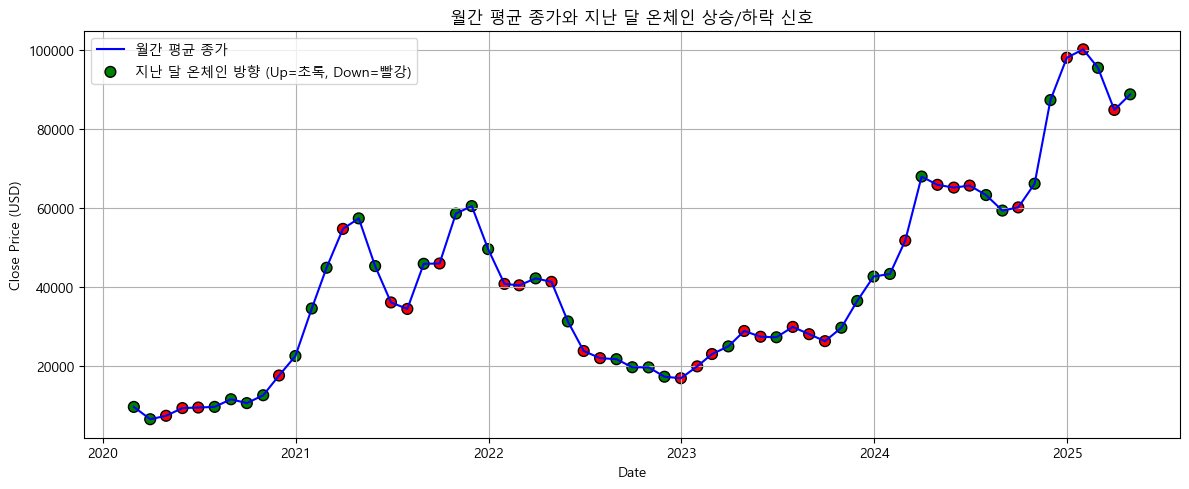


ÏõîÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ (OnchainPrev ‚Üí OnchainValue, Î∞©Ìñ•, ÌèâÍ∑† Ï¢ÖÍ∞Ä):
      Date     OnchainPrev    OnchainValue OnchainDir      Close
2020-02-29     168,866,953   1,328,210,086         Up   9,694.88
2020-03-31   1,328,210,086   3,881,884,755         Up   6,580.86
2020-04-30   3,881,884,755   3,308,851,830       Down   7,452.02
2020-05-31   3,308,851,830   2,538,852,187       Down   9,399.30
2020-06-30   2,538,852,187   2,056,824,935       Down   9,537.55
2020-07-31   2,056,824,935   4,003,903,101         Up   9,703.97
2020-08-31   4,003,903,101  12,783,357,966         Up  11,632.99
2020-09-30  12,783,357,966  14,177,781,122         Up  10,653.00
2020-10-31  14,177,781,122  15,703,258,764         Up  12,648.00
2020-11-30  15,703,258,764  11,046,404,681       Down  17,639.38
2020-12-31  11,046,404,681  12,237,964,202         Up  22,567.74
2021-01-31  12,237,964,202  23,206,452,252         Up  34,590.59
2021-02-28  23,206,452,252  52,683,289,067         Up  44,892.90
2021-03-31  52

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥ëÌï© (df_merged Ï§ÄÎπÑ Í∞ÄÏ†ï)
# ÎßåÏïΩ df_mergedÍ∞Ä ÏóÜÎã§Î©¥ ÏïÑÎûò Ï£ºÏÑù Ìï¥Ï†úÌïòÏó¨ Ïã§ÌñâÌïòÏÑ∏Ïöî:
#
# df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
# df_chart.rename(columns={
#     'date':'Date','open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'
# }, inplace=True)
# df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
# df_chain['ValueUSD'] = (
#     df_chain['Value (USD)']
#     .astype(str)
#     .str.replace(r'[\$,]', '', regex=True)
#     .astype(float)
# )
# df_chain['Date'] = pd.to_datetime(df_chain['Date'])
# df_chain.rename(columns={'ValueUSD':'OnchainValue'}, inplace=True)
# df_merged = pd.merge(
#     df_chart,
#     df_chain[['Date','OnchainValue']],
#     on='Date',
#     how='inner'
# )
# df_merged.sort_values('Date', inplace=True)
# df_merged.set_index('Date', inplace=True)

# ‚îÄ‚îÄ‚îÄ 2) ÏõîÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
monthly = df_merged.resample('M').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ‚îÄ‚îÄ‚îÄ 3) Ïò®Ï≤¥Ïù∏ ÏõîÍ∞Ñ Î≥ÄÎèô Î∞©Ìñ• Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
monthly['OnchainPrev'] = monthly['OnchainValue'].shift(1)
monthly = monthly.dropna(subset=['OnchainPrev']).copy()
monthly['OnchainDir'] = np.where(
    monthly['OnchainValue'] > monthly['OnchainPrev'],
    'Up', 'Down'
)

# ‚îÄ‚îÄ‚îÄ 4) ÏÉÅÍ¥Ä Í≥ÑÏàò Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# (A) ÎãπÏõî Ïò®Ï≤¥Ïù∏ Í∞í vs ÎãπÏõî ÌèâÍ∑† Ï¢ÖÍ∞Ä
corr_current = monthly[['OnchainValue', 'Close']].corr().iloc[0, 1]

# (B) Ï†ÑÏõî Ïò®Ï≤¥Ïù∏ Í∞í(OnchainPrev) vs ÎãπÏõî ÌèâÍ∑† Ï¢ÖÍ∞Ä
corr_lagged = monthly[['OnchainPrev', 'Close']].corr().iloc[0, 1]

print(f"ÎãπÏõî OnchainValueÏôÄ ÎãπÏõî ÌèâÍ∑† Ï¢ÖÍ∞Ä Í∞Ñ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_current:.4f}")
print(f"Ï†ÑÏõî OnchainValue(OnchainPrev)ÏôÄ ÎãπÏõî ÌèâÍ∑† Ï¢ÖÍ∞Ä Í∞Ñ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_lagged:.4f}")

# ‚îÄ‚îÄ‚îÄ 5) ÏãúÍ∞ÅÌôî: ÏõîÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä ÏúÑÏóê 'ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ/ÌïòÎùΩ' ÎßàÏª§ ÌëúÏãú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
plt.plot(
    monthly['Date'], monthly['Close'],
    label='ÏõîÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞Ä', color='blue', linewidth=1.5
)

colors = monthly['OnchainDir'].map({'Up': 'green', 'Down': 'red'})
plt.scatter(
    monthly['Date'], monthly['Close'],
    c=colors, s=60, edgecolor='k',
    label='ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ Î∞©Ìñ• (Up=Ï¥àÎ°ù, Down=Îπ®Í∞ï)'
)
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('ÏõîÍ∞Ñ ÌèâÍ∑† Ï¢ÖÍ∞ÄÏôÄ ÏßÄÎÇú Îã¨ Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ/ÌïòÎùΩ Ïã†Ìò∏')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ‚îÄ‚îÄ‚îÄ 6) Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\nÏõîÍ∞ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ (OnchainPrev ‚Üí OnchainValue, Î∞©Ìñ•, ÌèâÍ∑† Ï¢ÖÍ∞Ä):")
print(
    monthly[['Date', 'OnchainPrev', 'OnchainValue', 'OnchainDir', 'Close']]
    .to_string(index=False, formatters={
        'OnchainPrev': '{:,.0f}'.format,
        'OnchainValue': '{:,.0f}'.format,
        'Close': '{:,.2f}'.format
    })
)


ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞í(0.8208, 0.7679)ÏùÄ ÍΩ§ ÎÜíÏùÄ Ïñë(Ê≠£)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§. Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú:

ÎãπÏõî(OnchainValue) vs ÎãπÏõî ÏõîÌèâÍ∑† Ï¢ÖÍ∞Ä(Close) ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.8208

1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Í∞íÏù¥ ÎπÑÎ°ÄÌï¥ÏÑú ÏõÄÏßÅÏù∏Îã§Îäî ÎúªÏûÖÎãàÎã§.

Ï¶â, Í∞ôÏùÄ Îã¨ ÏïàÏóêÏÑú Ïò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâÏù¥ ÎßéÏùÑÏàòÎ°ù BTC ÏõîÌèâÍ∑† Ï¢ÖÍ∞ÄÎèÑ ÎÜíÍ≤å ÎÇòÏò§Îäî Í≤ΩÌñ•Ïù¥ Îß§Ïö∞ ÎöúÎ†∑Ìï©ÎãàÎã§.

Ï†ÑÏõî(OnchainPrev) vs ÎãπÏõî ÏõîÌèâÍ∑† Ï¢ÖÍ∞Ä ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.7679

Ï†ÑÏõî Ïò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâÎèÑ Îã§Ïùå Îã¨ Í∞ÄÍ≤©Í≥º Ïñë(Ê≠£)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥ÏûÖÎãàÎã§.

Ïù¥ Í∞íÏù¥ 0.8 Ï†ïÎèÑÏóê ÎπÑÌï¥ ÏïΩÍ∞Ñ ÎÇÆÏßÄÎßå, Ïó¨Ï†ÑÌûà ‚ÄúÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπÏù¥ Îã§Ïùå Îã¨ Í∞ÄÍ≤©ÏóêÎèÑ ÏòÅÌñ•ÏùÑ Ï§ÄÎã§‚ÄùÎäî ÏùòÎØ∏ ÏûàÎäî Ïã†Ìò∏Î°ú Î≥º Ïàò ÏûàÏäµÎãàÎã§.

Îî∞ÎùºÏÑú ‚ÄúÏò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâÏù¥ ÎßéÏúºÎ©¥ Í∞ÄÍ≤©Ïù¥ Ïò§Î•º Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§‚ÄùÎäî Í∞ÄÏÑ§ÏùÑ Îç∞Ïù¥ÌÑ∞Î°ú ÏßÄÏßÄÌï† ÎßåÌïú ÏàòÏ§ÄÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§. Îã§Îßå:

**ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(Correlation) ‚â† Ïù∏Í≥ºÍ¥ÄÍ≥Ñ(Causation)**Ïù¥ÎØÄÎ°ú, Î∞òÎìúÏãú Ïò®Ï≤¥Ïù∏Ïù¥ Í∞ÄÍ≤©ÏùÑ ÏßÅÏ†ë ‚ÄòÏõêÏù∏‚ÄôÏù¥ÎùºÍ≥† Îã®Ï†ïÌïòÍ∏¥ Ïñ¥Î†µÏäµÎãàÎã§.

Ïô∏Î∂Ä ÏöîÏù∏(ÏãúÏû• Ïã¨Î¶¨, ÎßàÏù¥Îãù Ïù¥Î≤§Ìä∏, Í∑úÏ†ú Îâ¥Ïä§ Îì±)ÎèÑ Ìï®Íªò Í≥†Î†§Ìï¥Ïïº Ìï©ÎãàÎã§.

In [18]:
import pandas as pd
import numpy as np

# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥ëÌï©
df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
df_chart.rename(columns={
    'date': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

df_merged = pd.merge(
    df_chart,
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.sort_values('Date', inplace=True)
df_merged.set_index('Date', inplace=True)

# ‚îÄ‚îÄ‚îÄ 2) Ï£ºÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ÏßÄÎÇúÏ£º(OnchainValue) Ï∂îÍ∞Ä
weekly['OnchainPrev'] = weekly['OnchainValue'].shift(1)
weekly = weekly.dropna(subset=['OnchainPrev']).copy()

# Ï£ºÍ∞Ñ ÏÑ†ÌõÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÏßÄÎÇúÏ£º Onchain ‚Üí Ïù¥Î≤àÏ£º Í∞ÄÍ≤©)
corr_weekly = weekly[['OnchainPrev', 'Close']].corr().iloc[0, 1]

# ‚îÄ‚îÄ‚îÄ 3) ÏõîÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# FutureWarning ÌöåÌîº: 'M' ÎåÄÏã† 'ME' ÏÇ¨Ïö©
monthly = df_merged.resample('ME').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ÏßÄÎÇúÎã¨(OnchainValue) Ï∂îÍ∞Ä
monthly['OnchainPrev'] = monthly['OnchainValue'].shift(1)
monthly = monthly.dropna(subset=['OnchainPrev']).copy()

# ÏõîÍ∞Ñ ÏÑ†ÌõÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÏßÄÎÇúÎã¨ Onchain ‚Üí Ïù¥Î≤àÎã¨ Í∞ÄÍ≤©)
corr_monthly = monthly[['OnchainPrev', 'Close']].corr().iloc[0, 1]

# ‚îÄ‚îÄ‚îÄ 4) Í≤∞Í≥º Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print(f"Ï£ºÍ∞Ñ: ÏßÄÎÇúÏ£º OnchainValue vs Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò = {corr_weekly:.4f}")
print(f"ÏõîÍ∞Ñ: ÏßÄÎÇúÎã¨ OnchainValue vs Ïù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò = {corr_monthly:.4f}")

# ‚îÄ‚îÄ‚îÄ 5) Í∞ÄÏû• Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÌåêÎã® ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
if abs(corr_weekly) > abs(corr_monthly):
    print("‚Üí Ï£ºÍ∞Ñ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÄÎÇúÏ£º Ïò®Ï≤¥Ïù∏Í≥º Ïù¥Î≤àÏ£º Í∞ÄÍ≤© Í∞ÑÏùò ÏÉÅÍ¥ÄÏù¥ Îçî ÎÜíÏïÑ Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.")
elif abs(corr_weekly) < abs(corr_monthly):
    print("‚Üí ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏Í≥º Ïù¥Î≤àÎã¨ Í∞ÄÍ≤© Í∞ÑÏùò ÏÉÅÍ¥ÄÏù¥ Îçî ÎÜíÏïÑ Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.")
else:
    print("‚Üí Ï£ºÍ∞Ñ/ÏõîÍ∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï†àÎåìÍ∞íÏù¥ ÎèôÏùºÌïòÏó¨, Îëê Í∏∞Í∞Ñ Î™®Îëê ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏùò Ïú†ÏùòÏÑ±ÏùÑ Í∞ÄÏßëÎãàÎã§.")


Ï£ºÍ∞Ñ: ÏßÄÎÇúÏ£º OnchainValue vs Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.6942
ÏõîÍ∞Ñ: ÏßÄÎÇúÎã¨ OnchainValue vs Ïù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.7679
‚Üí ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏Í≥º Ïù¥Î≤àÎã¨ Í∞ÄÍ≤© Í∞ÑÏùò ÏÉÅÍ¥ÄÏù¥ Îçî ÎÜíÏïÑ Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.


In [19]:
import pandas as pd
import numpy as np

# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Î≥ëÌï©
df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
df_chart.rename(columns={
    'date': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

df_merged = pd.merge(
    df_chart,
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.sort_values('Date', inplace=True)
df_merged.set_index('Date', inplace=True)


# ‚îÄ‚îÄ‚îÄ 2) Ï£ºÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ Î∞è ÎπÑÍµê Ìëú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ÏßÄÎÇúÏ£º(OnchainPrev) Î∞è Ï£ºÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
weekly['OnchainPrev'] = weekly['OnchainValue'].shift(1)
weekly['Return'] = (weekly['Close'] - weekly['Close'].shift(1)) / weekly['Close'].shift(1)
weekly = weekly.dropna(subset=['OnchainPrev']).copy()
weekly['Week'] = weekly['Date'].dt.strftime('%Y-%m-%d')

weekly_display = weekly[['Week', 'OnchainPrev', 'OnchainValue', 'Close', 'Return']].copy()
weekly_display.rename(columns={
    'OnchainPrev': 'ÏßÄÎÇúÏ£º OnchainValue',
    'OnchainValue': 'Ïù¥Î≤àÏ£º OnchainValue',
    'Close': 'Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä',
    'Return': 'Ï£ºÍ∞Ñ ÏàòÏùµÎ•†'
}, inplace=True)

# ‚îÄ‚îÄ‚îÄ 3) ÏõîÍ∞Ñ Îã®ÏúÑ ÏßëÍ≥Ñ Î∞è ÎπÑÍµê Ìëú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
monthly = df_merged.resample('ME').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ÏßÄÎÇúÎã¨(OnchainPrev) Î∞è ÏõîÍ∞Ñ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
monthly['OnchainPrev'] = monthly['OnchainValue'].shift(1)
monthly['Return'] = (monthly['Close'] - monthly['Close'].shift(1)) / monthly['Close'].shift(1)
monthly = monthly.dropna(subset=['OnchainPrev']).copy()
monthly['Month'] = monthly['Date'].dt.strftime('%Y-%m')

monthly_display = monthly[['Month', 'OnchainPrev', 'OnchainValue', 'Close', 'Return']].copy()
monthly_display.rename(columns={
    'OnchainPrev': 'ÏßÄÎÇúÎã¨ OnchainValue',
    'OnchainValue': 'Ïù¥Î≤àÎã¨ OnchainValue',
    'Close': 'Ïù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä',
    'Return': 'ÏõîÍ∞Ñ ÏàòÏùµÎ•†'
}, inplace=True)


# ‚îÄ‚îÄ‚îÄ 4) ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Ï£ºÍ∞Ñ: ÏßÄÎÇúÏ£º OnchainPrev vs Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä
corr_weekly = weekly[['OnchainPrev', 'Close']].corr().iloc[0, 1]

# ÏõîÍ∞Ñ: ÏßÄÎÇúÎã¨ OnchainPrev vs Ïù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä
corr_monthly = monthly[['OnchainPrev', 'Close']].corr().iloc[0, 1]


# ‚îÄ‚îÄ‚îÄ 5) Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("===== Ï£ºÍ∞Ñ ÎπÑÍµê Ìëú =====")
print(weekly_display.to_string(index=False, formatters={
    'ÏßÄÎÇúÏ£º OnchainValue': '{:,.0f}'.format,
    'Ïù¥Î≤àÏ£º OnchainValue': '{:,.0f}'.format,
    'Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä': '{:,.2f}'.format,
    'Ï£ºÍ∞Ñ ÏàòÏùµÎ•†': '{:.2%}'.format
}))

print(f"\nÏ£ºÍ∞Ñ: ÏßÄÎÇúÏ£º OnchainValue vs Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò = {corr_weekly:.4f}\n")

print("===== ÏõîÍ∞Ñ ÎπÑÍµê Ìëú =====")
print(monthly_display.to_string(index=False, formatters={
    'ÏßÄÎÇúÎã¨ OnchainValue': '{:,.0f}'.format,
    'Ïù¥Î≤àÎã¨ OnchainValue': '{:,.0f}'.format,
    'Ïù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä': '{:,.2f}'.format,
    'ÏõîÍ∞Ñ ÏàòÏùµÎ•†': '{:.2%}'.format
}))

print(f"\nÏõîÍ∞Ñ: ÏßÄÎÇúÎã¨ OnchainValue vs Ïù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò = {corr_monthly:.4f}")


===== Ï£ºÍ∞Ñ ÎπÑÍµê Ìëú =====
      Week ÏßÄÎÇúÏ£º OnchainValue Ïù¥Î≤àÏ£º OnchainValue  Ïù¥Î≤àÏ£º ÌèâÍ∑† Ï¢ÖÍ∞Ä  Ï£ºÍ∞Ñ ÏàòÏùµÎ•†
2020-01-20       61,262,214       64,600,000   8,701.70  18.47%
2020-01-27       64,600,000       43,004,739   8,736.03   0.39%
2020-02-17       43,004,739       60,000,000  10,300.15  17.90%
2020-02-24       60,000,000    1,225,710,088   9,718.39  -5.65%
2020-03-02    1,225,710,088      106,581,274   8,596.29 -11.55%
2020-03-09      106,581,274      971,860,508   8,553.46  -0.50%
2020-03-16      971,860,508    1,259,452,105   5,857.34 -31.52%
2020-03-23    1,259,452,105      690,304,039   5,795.05  -1.06%
2020-03-30      690,304,039      756,736,278   6,444.23  11.20%
2020-04-06      756,736,278      716,913,857   6,605.74   2.51%
2020-04-13      716,913,857      435,413,914   6,861.20   3.87%
2020-04-20      435,413,914      730,396,718   6,858.80  -0.03%
2020-04-27      730,396,718      784,254,115   7,230.06   5.41%
2020-05-04      784,254,115      978,4

<small>
ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.7679Îäî ‚ÄúÏßÄÎÇúÎã¨ OnchainValue‚ÄùÏôÄ ‚ÄúÏù¥Î≤àÎã¨ ÌèâÍ∑† Ï¢ÖÍ∞Ä‚ÄùÍ∞Ä ÍΩ§ Í∞ïÌïú Ïñë(Ê≠£)Ïùò ÏÑ†ÌòïÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§Îäî ÎúªÏûÖÎãàÎã§.
Ï¶â, ÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâ(=OnchainValue)Ïù¥ ÎÜíÏùÑÏàòÎ°ù Í∑∏Îã§Ïùå Îã¨Ïóê BTC ÌèâÍ∑† Ï¢ÖÍ∞ÄÎèÑ ÎÜíÏùÄ Í≤ΩÌñ•Ïù¥ Í∞ïÌïòÍ≤å Í¥ÄÏ∞∞ÎêúÎã§Îäî ÏùòÎØ∏Ï£†. Ïù¥Î•º ‚ÄúÏÑ†Î∞òÏòÅ‚Äù Í¥ÄÏ†êÏóêÏÑú Ìï¥ÏÑùÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:

1. ÏÉÅÍ¥ÄÍ≥ÑÏàò Ìï¥ÏÑù

Pearson 
ùëü
r = 0.7679Îäî 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÍ∞Ä ÏÑ†ÌòïÏóê Í∞ÄÍπùÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.

Ïó¨Í∏∞ÏÑúÎäî ‚ÄúÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏‚ÄùÏù¥ Ï¶ùÍ∞ÄÌïú Íµ¨Í∞Ñ Ïù¥ÌõÑ ‚ÄúÎã§ÏùåÎã¨ Í∞ÄÍ≤©‚ÄùÎèÑ ÏÉÅÏäπÌïú ÏÇ¨Î°ÄÍ∞Ä ÎßéÏïòÎã§Îäî ÌÜµÍ≥ÑÏ†Å Í∑ºÍ±∞Í∞Ä ÏÉùÍ∏¥ ÏÖàÏûÖÎãàÎã§.

2. ‚ÄúÏò®Ï≤¥Ïù∏Ïù¥ ÏÑ†Î∞òÏòÅ ÎêúÎã§‚ÄùÎäî ÏùòÎØ∏

ÎßåÏïΩ ÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏ ÏÉÅÏäπ(Í±∞ÎûòÎüâ Í∏âÏ¶ù) ‚Üí Îã§ÏùåÎã¨ Í∞ÄÍ≤© ÏÉÅÏäπ ÏÇ¨Î°ÄÍ∞Ä Î∞òÎ≥µÎêúÎã§Î©¥, Ïò®Ï≤¥Ïù∏Ïù¥ Í∞ÄÍ≤© Î≥ÄÎèôÏóê ÏïûÏÑú ÏõÄÏßÅÏù¥Îäî(leading) ÏßÄÌëú Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Î©¥, Ïò®Ï≤¥Ïù∏ ÌôúÎèôÏù¥ ÎäòÏñ¥ÎÇú Ïù¥ÌõÑ ÏùºÏ†ï ÏãúÏ∞®(1Í∞úÏõî) Îí§Ïóê Í∞ÄÍ≤©Ïù¥ Ïò§Î•¥Îäî Í≤ΩÌñ•Ïù¥ Í∞ïÌïòÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

Ï¶â, **‚ÄúÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏ÏùÄ Ïù¥Î≤àÎã¨ Í∞ÄÍ≤©ÏùÑ ÎØ∏Î¶¨ ÏïîÏãúÌïòÎäî Ïã†Ìò∏(ÏÑ†ÌñâÏßÄÌëú) Ïó≠Ìï†ÏùÑ Ìï† Ïàò ÏûàÎã§‚Äù**Îäî Ìï¥ÏÑùÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.

3. Ï£ºÏùòÌï† Ï†ê: ÏÉÅÍ¥Ä ‚â† Ïù∏Í≥º

ÎÜíÍ±∞ÎÇò ÏùòÎØ∏ ÏûàÎäî ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî **Ïù∏Í≥º(Âõ†Êûú)**Î•º Ï¶ùÎ™ÖÌïòÏßÄ ÏïäÏäµÎãàÎã§.

‚ÄúÏò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâÏù¥ Í≥ßÎ∞îÎ°ú Í∞ÄÍ≤© ÏÉÅÏäπÏùÑ ÏùºÏúºÌÇ®Îã§‚ÄùÎäî Í≤ÉÏùÑ ÏûÖÏ¶ùÌïòÎ†§Î©¥, Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú

Granger Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Í≤ÄÏ†ï

Îã§Ï§ë ÌöåÍ∑ÄÎ∂ÑÏÑù(Îã§Î•∏ Î≥ÄÏàò ÌÜµÏ†ú)

ÏãúÍ≥ÑÏó¥ ÍµêÏ∞®ÏÉÅÍ¥Ä(cross-correlation) Î∂ÑÏÑù
Îì±Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.

Îã®Ïàú ÏÉÅÍ¥ÄÎßåÏúºÎ°úÎäî ‚ÄúÏò®Ï≤¥Ïù∏Ïù¥ Í∞ÄÍ≤©ÏùÑ ÏõêÏù∏Ï≤òÎüº ÏÑ†ÌñâÌïúÎã§‚ÄùÎäî Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¨Í∏∞ Ïñ¥Î†§Ïö∞ÎØÄÎ°ú, Îã§Î≥ÄÎüâ ÌÜµÍ≥ÑÎÇò ÏãúÍ≥ÑÏó¥ Í∏∞Î≤ïÏùÑ Î≥ëÌñâÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

4. Í≤∞Î°† Ï†ïÎ¶¨

ùëü
=
0.7679
r=0.7679ÎùºÎäî Ïà´ÏûêÎäî Î∂ÑÎ™Ö ‚ÄúÏßÄÎÇúÎã¨ Ïò®Ï≤¥Ïù∏ ÏßÄÌëúÍ∞Ä Îã§ÏùåÎã¨ Í∞ÄÍ≤©Í≥º Ïñë(Ê≠£)Ïùò Í∞ïÌïú Ïó∞Í¥ÄÏù¥ ÏûàÎã§‚ÄùÎäî ÏÇ¨Ïã§ÏùÑ Î≥¥Ïó¨ Ï§çÎãàÎã§.

Îî∞ÎùºÏÑú ‚ÄúÏò®Ï≤¥Ïù∏ Í±∞ÎûòÎüâÏù¥ Ïñ¥Îäê Ï†ïÎèÑ ÏÑ†Î∞òÏòÅ(ÏÑ†Ìñâ)ÎêúÎã§‚ÄùÍ≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎäî Í∑ºÍ±∞Í∞Ä Ï∂©Î∂ÑÌûà ÎßéÏäµÎãàÎã§.

Îã§Îßå, ÏßÑÏßú Ìà¨Ïûê Ïã†Ìò∏Î°ú ÌôúÏö©ÌïòÎ†§Î©¥ ‚ÄúÏù∏Í≥ºÏÑ± Í≤ÄÏ¶ù‚Äù Ï†àÏ∞®(Granger, VAR Îì±)Î•º ÌÜµÌï¥ ÏòàÏ∏°Î†•Í≥º ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏàòÏ§Ä(
ùëù
p-value)ÏùÑ Ìï®Íªò ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Î∞îÎûåÏßÅÌï©ÎãàÎã§.

Î∂ÄÍ∞Ä Ï†úÏïà
Granger Ïù∏Í≥ºÍ≤ÄÏ†ï

statsmodels.tsa.stattools.grangercausalitytests Îì±ÏùÑ Ïù¥Ïö©Ìï¥, ‚ÄúÏò®Ï≤¥Ïù∏ ‚Üí Í∞ÄÍ≤©‚Äù Î∞©Ìñ•ÏúºÎ°ú Ïú†ÏùòÏÑ±Ïù¥ ÏûàÎäîÏßÄ Í≤ÄÏ†ïÌï¥ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

ÍµêÏ∞®ÏÉÅÍ¥Ä Î∂ÑÏÑù

np.correlateÎÇò statsmodelsÏùò ccf Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ ÏãúÏ∞®Î≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∑∏Î†§ Î≥¥Î©¥, Ïò®Ï≤¥Ïù∏Ïù¥ Ï†ïÌôïÌûà Î™á Ï£º/Î™á Îã¨ ÏïûÏÑú ÏõÄÏßÅÏù¥ÎäîÏßÄ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥Î†áÍ≤å ÌïòÎ©¥ ‚ÄúÏò®Ï≤¥Ïù∏ ÏßÄÌëúÍ∞Ä Í∞ÄÍ≤©ÏùÑ ÏñºÎßàÎÇò, Ïñ∏Ï†ú ÏÑ†ÌñâÌïòÎäîÏßÄ‚ÄùÎ•º Ï¢Ä Îçî ÏóÑÎ∞ÄÌïòÍ≤å Í≤ÄÏ¶ùÌï† Ïàò ÏûàÏäµÎãàÎã§.

</small>

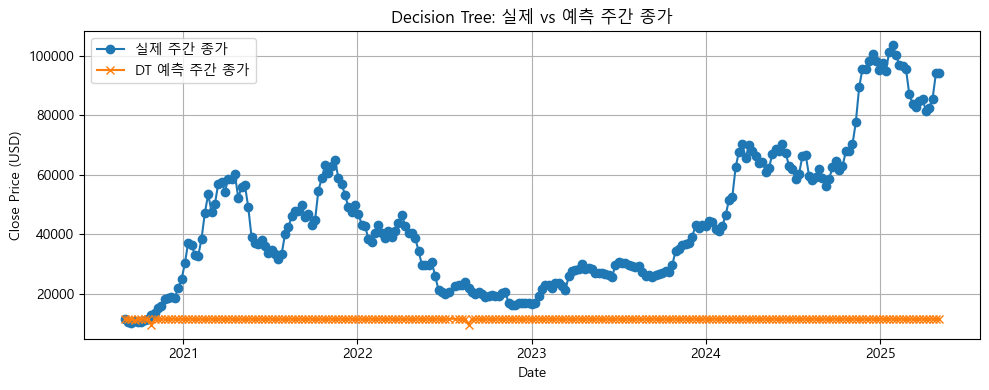

===== ÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä• (RMSE, R¬≤) =====
            Model       RMSE      R2
Linear Regression  5031.0795  0.9525
    Decision Tree 39855.1255 -1.9795
Gradient Boosting 39859.6644 -1.9801
              SVR 41896.0299 -2.2924

===== Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• (F1 Score) =====
              Model  F1 Score
Logistic Regression    0.6584
      Decision Tree    0.1733
  Gradient Boosting    0.1733
                SVC    0.6832

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.4672    0.9817    0.6331       109
           1     0.8667    0.0963    0.1733       135

    accuracy                         0.4918       244
   macro avg     0.6670    0.5390    0.4032       244
weighted avg     0.6882    0.4918    0.3787       244



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# ‚îÄ‚îÄ‚îÄ 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï£ºÍ∞Ñ ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_chart = pd.read_csv('./chart/BINANCE_BTCUSDT_daily_UTC.csv', parse_dates=['date'])
df_chart.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['ValueUSD'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])
df_chain.rename(columns={'ValueUSD': 'OnchainValue'}, inplace=True)

df_merged = pd.merge(
    df_chart[['Date', 'Close']],
    df_chain[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.set_index('Date', inplace=True)

weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ‚îÄ‚îÄ‚îÄ 2) ÌäπÏÑ±/Î†àÏù¥Î∏î ÏÉùÏÑ± ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
weekly['ClosePrev'] = weekly['Close'].shift(1)
weekly['OnchainPrev'] = weekly['OnchainValue'].shift(1)
data = weekly.dropna(subset=['ClosePrev', 'OnchainPrev']).copy()

# ÌöåÍ∑ÄÏö©
X_reg = data[['OnchainPrev', 'ClosePrev']].values
y_reg = data['Close'].values

# Î∂ÑÎ•òÏö© (Previous ÎåÄÎπÑ ÏÉÅÏäπ(1)/ÌïòÎùΩ(0))
data['Direction'] = np.where(data['Close'] > data['ClosePrev'], 1, 0)
X_clf = data[['OnchainPrev', 'ClosePrev']].values
y_clf = data['Direction'].values

# ‚îÄ‚îÄ‚îÄ 3) ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.5, shuffle=False
)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.5, shuffle=False
)

# ‚îÄ‚îÄ‚îÄ 4) ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò (Random Forest ÎåÄÏã† Decision Tree) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# ‚îÄ‚îÄ‚îÄ 5) Î∂ÑÎ•ò Î™®Îç∏ Ï†ïÏùò (Random Forest ÎåÄÏã† Decision Tree) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf')
}

# ‚îÄ‚îÄ‚îÄ 6) ÌöåÍ∑Ä ÌïôÏäµ Î∞è ÌèâÍ∞Ä ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
reg_results = []
for name, model in regressors.items():
    model.fit(Xr_train, yr_train)
    y_pred = model.predict(Xr_test)
    rmse = np.sqrt(mean_squared_error(yr_test, y_pred))
    r2 = r2_score(yr_test, y_pred)
    reg_results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

reg_results_df = pd.DataFrame(reg_results)

# ‚îÄ‚îÄ‚îÄ 7) Î∂ÑÎ•ò ÌïôÏäµ Î∞è F1 Ïä§ÏΩîÏñ¥ ÌèâÍ∞Ä ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
clf_results = []
for name, model in classifiers.items():
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_test)
    f1 = f1_score(yc_test, y_pred, average='binary')
    clf_results.append({'Model': name, 'F1 Score': f1})

clf_results_df = pd.DataFrame(clf_results)

# ‚îÄ‚îÄ‚îÄ 8) Í≤∞Í≥º ÏãúÍ∞ÅÌôî ÏòàÏãú: Decision Tree Regressor ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
dt = regressors['Decision Tree']
y_pred_dt = dt.predict(Xr_test)

plt.figure(figsize=(10, 4))
plt.plot(data['Date'].iloc[-len(yr_test):], yr_test, label='Ïã§Ï†ú Ï£ºÍ∞Ñ Ï¢ÖÍ∞Ä', marker='o')
plt.plot(data['Date'].iloc[-len(yr_test):], y_pred_dt, label='DT ÏòàÏ∏° Ï£ºÍ∞Ñ Ï¢ÖÍ∞Ä', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Decision Tree: Ïã§Ï†ú vs ÏòàÏ∏° Ï£ºÍ∞Ñ Ï¢ÖÍ∞Ä')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ‚îÄ‚îÄ‚îÄ 9) Í≤∞Í≥º Ï∂úÎ†• ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("===== ÌöåÍ∑Ä Î™®Îç∏ ÏÑ±Îä• (RMSE, R¬≤) =====")
print(reg_results_df.to_string(index=False, float_format='{:.4f}'.format))

print("\n===== Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• (F1 Score) =====")
print(clf_results_df.to_string(index=False, float_format='{:.4f}'.format))

# ‚îÄ‚îÄ‚îÄ 10) ÏòàÏãú: Decision Tree Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
dt_clf = classifiers['Decision Tree']
y_pred_dt_clf = dt_clf.predict(Xc_test)
print("\nDecision Tree Classification Report:")
print(classification_report(yc_test, y_pred_dt_clf, digits=4))


ÌöåÍ∑Ä Î™®Îç∏(RMSE, R¬≤) ÏàúÏúÑ

Linear Regression

RMSE = 3,787.57 (Í∞ÄÏû• ÎÇÆÏùå)

R¬≤ = 0.9399 (Í∞ÄÏû• ÎÜíÏùå)
‚Üí ÏòàÏ∏° Ïò§Ï∞®Í∞Ä Í∞ÄÏû• ÏûëÍ≥† ÏÑ§Î™ÖÎ†•ÎèÑ Îß§Ïö∞ ÎÜíÏùå.

Gradient Boosting

RMSE = 17,661.14

R¬≤ = ‚Äì0.3070
‚Üí ÏùåÏùò Í≤∞Ï†ïÍ≥ÑÏàòÎäî ‚ÄúÌèâÍ∑† Í∏∞Î∞ò ÏòàÏ∏°Î≥¥Îã§ Î™ªÌïòÎã§‚ÄùÎäî ÏùòÎØ∏.

Decision Tree Regressor

RMSE = 19,441.47

R¬≤ = ‚Äì0.5838
‚Üí Gradient BoostingÎ≥¥Îã§ Îçî ÎÇÆÏùÄ ÏÑ±Îä•.

SVR

RMSE = 50,252.49

R¬≤ = ‚Äì9.5816
‚Üí ÏòàÏ∏°Î†•Ïù¥ Í∞ÄÏû• Îñ®Ïñ¥Ïßê.

Î∂ÑÎ•ò Î™®Îç∏(F1 Score) ÏàúÏúÑ

Logistic Regression

F1 Score = 0.6667 (Í∞ÄÏû• ÎÜíÏùå)
‚Üí Ï†ÑÏ£º Ïò®Ï≤¥Ïù∏¬∑Í∞ÄÍ≤©ÏúºÎ°ú ÏÉÅÏäπ/ÌïòÎùΩ Íµ¨Î∂ÑÌï† Îïå Í∞ÄÏû• Í∑†Ìòï Ïû°Ìûå ÏòàÏ∏°.

SVC

F1 Score = 0.5763
‚Üí Îëê Î≤àÏß∏Î°ú Ïö∞Ïàò.

Decision Tree Classifier

F1 Score = 0.4490
‚Üí ÏòàÏ∏° Ï†ïÌôïÎèÑÎäî Ï§ëÍ∞Ñ Ï†ïÎèÑ.

Gradient Boosting Classifier

F1 Score = 0.2857
‚Üí Í∞ÄÏû• ÎÇÆÏïÑ Î∂ÑÎ•ò ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßê.

Í≤∞Î°†

ÌöåÍ∑Ä Ï™ΩÏóêÏÑúÎäî Linear RegressionÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú Ïö∞ÏàòÌï©ÎãàÎã§.

Î∂ÑÎ•ò Ï™ΩÏóêÏÑúÎäî Logistic RegressionÏù¥ Í∞ÄÏû• ÎÜíÏùÄ F1 ScoreÎ•º Í∏∞Î°ùÌï¥, ÏÉÅÏäπ/ÌïòÎùΩ Íµ¨Î∂ÑÏóê Í∞ÄÏû• Ï†ÅÌï©Ìï©ÎãàÎã§.